<h1><b>AGRUPACIÓN Y PREDICCIÓN DE LA ACTIVIDAD</b></h1>

En nuestra unidad de negocio de Instalaciones y Mantenimiento, dividimos la actividad en actuaciones. Cada actuación representa una instalación en la casa de un cliente o la reparación de una avería.<br>

Cuando una actuación es resuelta, dependiendo de lo realizado, se le agrupa y se le da un valor en puntos. Esta puntuación determinará más tarde el beneficio que, como empresa, obtenemos por cada actuación.<br>

Antes de que la actuación esté resuelta, no consideramos esta agrupación, por lo que, conocer este dato nos podría dar una ventaja, y, además, optimizar el proceso de realización.<br>

A lo largo de nuestra formación, nos dotan de mecanismos para clasificar estas actuaciones y predecir la cantidad de puntos con un bajo margen de error.<br>

Dado que la cantidad de puntos que pueden ser asignados, es un conjunto finito, en este ejemplo básico vamos a usar un árbol de decisión para asignar una cantidad de puntos a cada actuación.<br>

# <h2>Proceso:</h2>

Cargamos las librerías necesarias:

In [ ]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Nos traemos los datos y les echamos un vistazo:

In [ ]:
# Carga del dataset
df = pd.read_excel("retoVerne2022.xlsx")
df

,Tipo_actuacion,Reutilizacion_de_acometida,Evolucion,Servicio TV,STB,TipoActividad,Puntos
0,15,Si,1,TV1,NaN,7,6672
1,15,Si,1,No,NaN,4,6369
2,21,Si,9,No,NaN,0,6369
3,0,No,9,No,NaN,0,9312
4,0,No,9,No,NaN,0,9312
...,...,...,...,...,...,...,...
193297,0,No,9,No,NaN,0,9312
193298,0,Si,9,No,NaN,0,6369
193299,0,No,9,No,NaN,0,9312
193300,0,No,9,No,NaN,0,9312


Observamos que, en algunos campos, hay valores indeterminados. Existen <b>múltiples maneras de tratar estos valores</b>. En este caso, optamos por una solución simple: darles a todos el valor -1, que es numérico y distintivo.

In [ ]:
# Valores indeterminados
df["Tipo_actuacion"] = df["Tipo_actuacion"].fillna(-1)
df["Reutilizacion_de_acometida"] = df["Reutilizacion_de_acometida"].fillna(-1)
df["Evolucion"] = df["Evolucion"].fillna(-1)
df["Servicio TV"] = df["Servicio TV"].fillna(-1)
df["STB"] = df["STB"].fillna(-1)
df["TipoActividad"] = df["TipoActividad"].fillna(-1)

Analizamos los diferentes valores de cada atributo, dándoles un valor numérico:

In [ ]:
# Modificar df["Tipo_actuacion"]
df["Tipo_actuacion"].unique()

array([15, 21,  0, 10, 12, 11, 13,  5, 19, 24, 16,  1, 14,  7,  8, 17,  3,
       20, 25,  2,  9, 18,  6, 23,  4, 22])

In [ ]:
# Modificar df["Reutilizacion_de_acometida"]
df["Reutilizacion_de_acometida"] = df["Reutilizacion_de_acometida"].replace("Si", 1)
df["Reutilizacion_de_acometida"] = df["Reutilizacion_de_acometida"].replace("No", 0)
df["Reutilizacion_de_acometida"].unique()

array([ 1,  0, -1])

In [ ]:
# Modificar df["Evolucion"]
df["Evolucion"].unique()

array([ 1,  9,  7, 11,  3, 10,  8,  0,  2,  5,  6,  4])

In [ ]:
# Modificar df["Servicio TV"]
df["Servicio TV"].unique()

array(['TV1', 'No', 'TV2', -1], dtype=object)

In [ ]:
df["Servicio TV"] = df["Servicio TV"].replace("TV1",1)
df["Servicio TV"] = df["Servicio TV"].replace("TV2",2)
df["Servicio TV"] = df["Servicio TV"].replace("No",0)
df["Servicio TV"].unique()

array([ 1,  0,  2, -1])

In [ ]:
# Modificar df["STB"]
df["STB"].unique()

array([-1, 'Si', 'No'], dtype=object)

In [ ]:
df["STB"] = df["STB"].replace("Si", 1)
df["STB"] = df["STB"].replace("No", 0)
df["STB"].unique()

array([-1,  1,  0])

El objetivo es predecir los valores de "Puntos", hagamos un estudio sobre ellos:

In [ ]:
# Diferentes valores atributo objetivo
df["Puntos"].unique()

array([ 6672,  6369,  9312,  4850,  9602,  5940,  6548,  3220,  3000,
       14000,  9000,  4950, 17000,  4180,     0, 10379, 11000],
      dtype=int64)

In [ ]:
# Distribución de valores
posibles_valores = df.groupby("Puntos").count()
posibles_valores["Valor"] = posibles_valores["STB"]
posibles_valores["Valor"]

Puntos
0           75
3000      1668
3220      5508
4180      1077
4850      4006
4950       261
5940      3438
6369     40163
6548      4867
6672     18087
9000       703
9312     79718
9602     32496
10379        2
11000       75
14000      604
17000      554
Name: Valor, dtype: int64

Separamos ahora el conjunto de datos entre dos: entrenamiento y test

In [ ]:
# Separación conjuntos train y test
X = df.values[:,:6]
y = df["Puntos"].values
train_X, test_X, train_y, test_y = train_test_split(X, y)

Creamos un árbol de decisión con ciertos parámetros básicos:

In [ ]:
# Modelo
model = DecisionTreeClassifier(criterion = "gini", max_depth = 3)
model.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=3)

Calculamos las predicciones y comprobamos la precisión del modelo entrenado:

In [ ]:
# Predicciones
predict_y = model.predict(test_X)

print(f"Accuracy Score: {accuracy_score(test_y, predict_y)}")

Accuracy Score: 0.9115176095683483


Analicemos un poco qué hay detrás del resultado:

In [ ]:
# Inspeccionar el resultado
sol = pd.DataFrame(columns=["real", "pred"])
sol["real"] = test_y
sol["pred"] = predict_y
fallos = sol[sol["real"]!=sol["pred"]]
fallos

,real,pred
6,5940,6369
11,6548,9312
23,5940,6672
38,5940,6672
43,6548,9602
...,...,...
48225,4850,6672
48259,5940,6369
48267,4180,3220
48282,6548,9602


In [ ]:
# Valores que cuestan predecir
fallos.groupby("real").count()

,pred
real,
0,17
3000,167
3220,150
4180,270
4850,1032
4950,59
5940,862
6548,1226
9000,173


In [ ]:
# Valores predichos incorrectamente. Ojo con el overfitting.
fallos.groupby("pred").count()

,real
pred,
3000,60
3220,399
6369,1767
6672,644
9312,1058
9602,348


# <h2>Reto:</h2>

<b>¿Es posible encontrar algún modelo de clasificación o regresión que nos ofrezca mayor precisión que el obtenido en este ejemplo</b><br>
Cabe tener en cuenta lo siguiente:<br>
- El tratamiento de valores indeterminados puede hacerse de manera más exhaustiva.
- No todos los modelos necesitan que los valores sean numéricos.
- Existen igualmente muchas maneras de pasar de datos categóricos a numéricos, quizás más eficientes.
- Existen parámetros para decidir qué porcentaje de datos se destina a entrenamiento y a test.
- Es interesante saber qué hay detrás del valor que se obtenga. No siempre tener un valor mejor significa que el modelo es más completo.

In [ ]:
import numpy as np
import seaborn as sns

Primero realizamos una gráfica de distribución para observar como son los datos.

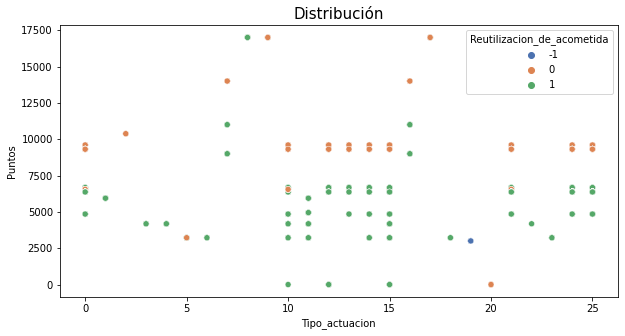

In [ ]:
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.set_title('Distribución', fontsize=15)
sns.scatterplot(data=df, x="Tipo_actuacion", y="Puntos", hue="Reutilizacion_de_acometida", palette="deep")
plt.show()

Por como vemos la distribución de puntos, lo más seguro es que sea un problema de clasificación. Además, previamente se ha utilizado la función `unique` mostrando que tan solo se dispone de 17 valores posibles de puntos. Parece un problema, a priori, de valores continuos pero observando los datos podemos suponer que todas las variables son etiquetas. Aun así realizaremos na matriz de correlación para saber si alguna de las variables es dependiente de las otras, es decir, examinaremos la relación entre estas.

[]

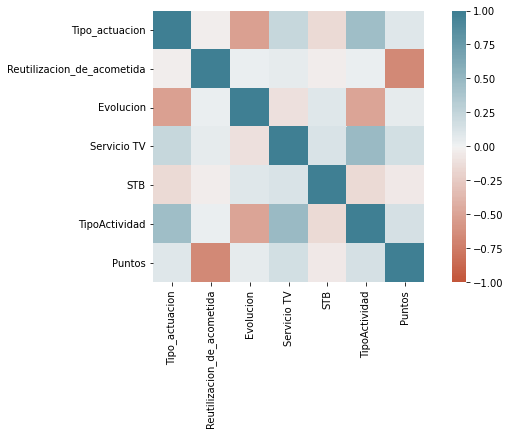

In [ ]:
corr = df.corr()
fig1, ax = plt.subplots(figsize=(10,5))
sns.heatmap(corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),square=True)

ax.plot()

Podemos observar como todas las variables son útiles para predecir nuestra variable respuesta *Puntos*. Por otro lado, observando la relación por parejas del resto de variables explicativas, no se aprecia ninguna relación significativa entre ellas.

In [ ]:
# Separación en variables explicativas y variable respuesta
y = df.Puntos
x = df.drop('Puntos',axis=1)

# Separación de datos en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
print(x_train.shape, x_test.shape)

(135311, 6) (57991, 6)


Utilizaremos el método de validación cruzada sobre distintos tipos de clasificadores para saber cuales son los mejores a utilizar. Realizaremos lo mismo también para distintos tipos de regresores.

### Calcular los aciertos de  varios clasificadores (validación cruzada)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

names = ["Nearest Neighbors", "Linear SVM", "Radial SVM",
         "Decision Tree", "Random Forest", "MLP", "Logistic Regression"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=3),
    RandomForestClassifier(max_depth=3, n_estimators=6, max_features=1),
    MLPClassifier(alpha=1),
    LogisticRegression()]


In [ ]:
%%capture --no-stdout
for name, clf in zip(names, classifiers):
  results = np.round(cross_val_score(clf, x_train, y_train, cv=5),2)
  print('{:20s} media: {:.2} resultados: {}'.format(name,results.mean(), results))

Nearest Neighbors    media: 1.0 resultados: [1. 1. 1. 1. 1.]
Linear SVM           media: 0.94 resultados: [0.94 0.94 0.94 0.94 0.94]
Radial SVM           media: 1.0 resultados: [1. 1. 1. 1. 1.]
Decision Tree        media: 0.91 resultados: [0.91 0.91 0.91 0.91 0.91]
Random Forest        media: 0.8 resultados: [0.82 0.88 0.8  0.91 0.61]
MLP                  media: 0.97 resultados: [0.97 0.97 0.97 0.97 0.97]
Logistic Regression  media: 0.92 resultados: [0.92 0.92 0.92 0.92 0.92]


Este resultado nos dice que los clasificadores de  primeros vecinos y svm radial proporcionan buenos valores tras la validación cruzada (debido a posibles casos de sobre ajuste, toamremos tambien el modelo MLP que utiliza una red neuronal para resolver el problema). A continuación, implementaremos los mejores modelos:

### Calcular los aciertos de  varios ejemplos de regresión (validación cruzada)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

names = ["Nearest Neighbors",
         "Decision Tree", "Random Forest", "Neural Net", "Linear Regression"]

regressors = [
    KNeighborsRegressor(3),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    MLPRegressor(),
    LinearRegression()]

In [ ]:
%%capture --no-stdout
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# iterate over classifiers
cv = KFold(n_splits=5)
estimators = [ ('standardize', StandardScaler()), () ]
for name, reg in zip(names, regressors):
  estimators[1]=(name, reg)
  pipeline = Pipeline(estimators)

  results = -np.round(cross_val_score(pipeline, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv),2)
  print('{:20s} media: {:.02} resultados: {}'.format(name,results.mean(), results))

Nearest Neighbors    media: 0.33 resultados: [0.27 0.09 0.4  0.36 0.55]
Decision Tree        media: 0.13 resultados: [0.   0.02 0.15 0.24 0.26]
Random Forest        media: 0.25 resultados: [0.03 0.29 0.08 0.32 0.55]
Neural Net           media: 3e+02 resultados: [299.83 302.96 311.7  295.41 305.14]
Linear Regression    media: 7.4e+02 resultados: [743.1  737.03 753.82 736.87 751.55]


Viendo la tasa de acierto y como fallana los dos últimos métodos podemos confirmar que se trata de un problema de clasificación.


# OPCION 1: Otros métodos de clasificación.

In [ ]:
df2 = df.copy()
df2 = df2.drop_duplicates()
df2

,Tipo_actuacion,Reutilizacion_de_acometida,Evolucion,Servicio TV,STB,TipoActividad,Puntos
0,15,1,1,1,-1,7,6672
1,15,1,1,0,-1,4,6369
2,21,1,9,0,-1,0,6369
3,0,0,9,0,-1,0,9312
5,0,0,7,0,-1,0,9312
...,...,...,...,...,...,...,...
187216,3,1,0,1,0,0,4180
187226,4,1,0,-1,-1,0,4180
192302,5,1,0,2,1,0,3220
192519,22,1,0,1,0,0,4180


In [ ]:
# Separación en variables explicativas y variable respuesta
y2 = df2.Puntos
x2 = df2.drop('Puntos',axis=1)

# Separación de datos en entrenamiento y test
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=123)
print(x_train2.shape, x_test2.shape)

(157, 6) (68, 6)


Como solo hay 200 filas realmente es normal que estas lineas esten incluidas en las 130k de entrenamiento y en los 50k de test y por eso la precision es muy alta.

Probaremos con todos los datos y con solo las lineas que no estan duplicadas para ver la diferencia:

### Primeros vecinos

#### Todos los datos

In [ ]:
# Modelo
model = KNeighborsClassifier(2)
model.fit(x_train, y_train)

NameError: ignored

In [ ]:
# Predicciones
predict_y = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test, predict_y)}")
score = model.score(x_test, y_test)
print('aciertos: {:.2f}'.format(score))

Accuracy Score: 0.999896535669328
aciertos: 1.00


In [ ]:
sol = pd.DataFrame(columns=["real", "pred"])
sol["real"] = y_test
sol["pred"] = predict_y
fallos = sol[sol["real"]!=sol["pred"]]
fallos

,real,pred
192519,4180,3220
183804,0,6672
158929,4180,4850
2409,9602,6548
17279,10379,5940
33908,9602,6548


In [ ]:
# Valores que cuestan predecir
fallos.groupby("real").count()

,pred
real,
0,1
4180,2
9602,2
10379,1


In [ ]:
# Valores predichos incorrectamente. Ojo con el overfitting.
fallos.groupby("pred").count()

,real
pred,
3220,1
4850,1
5940,1
6548,2
6672,1


#### Datos no duplicados

In [ ]:
# Modelo
model = KNeighborsClassifier(3)
model.fit(x_train2, y_train2)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predicciones
predict_y = model.predict(x_test2)

print(f"Accuracy Score: {accuracy_score(y_test2, predict_y)}")
score = model.score(x_test2, y_test2)
print('aciertos: {:.2f}'.format(score))

Accuracy Score: 0.4411764705882353
aciertos: 0.44


In [ ]:
sol = pd.DataFrame(columns=["real", "pred"])
sol["real"] = y_test2
sol["pred"] = predict_y
fallos = sol[sol["real"]!=sol["pred"]]
fallos.head()

,real,pred
65728,9602,6548
373,4850,6369
47,9602,5940
397,5940,6369
46,9602,5940


Si no tenemos en cuenta todos los datos vemoas como la precisión baja considerablemente.

### SVM Radial

#### Todos los datos

In [ ]:
# Modelo
model = SVC(gamma=2, C=1)
model.fit(x_train, y_train)

SVC(C=1, gamma=2)

In [ ]:
# Predicciones
predict_y = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test, predict_y)}")

Accuracy Score: 0.999896535669328


In [ ]:
sol = pd.DataFrame(columns=["real", "pred"])
sol["real"] = y_test
sol["pred"] = predict_y
fallos = sol[sol["real"]!=sol["pred"]]
fallos

,real,pred
192519,4180,9602
158493,4180,9602
183804,0,6672
147212,17000,9602
158929,4180,9602
184217,4180,9602


In [ ]:
# Valores que cuestan predecir
fallos.groupby("real").count()

,pred
real,
0,1
4180,4
17000,1


In [ ]:
# Valores predichos incorrectamente. Ojo con el overfitting.
fallos.groupby("pred").count()

,real
pred,
6672,1
9602,5


#### Datos no duplicados

In [ ]:
# Modelo
model = SVC(gamma=2, C=1)
model.fit(x_train2, y_train2)

SVC(C=1, gamma=2)

In [ ]:
# Predicciones
predict_y = model.predict(x_test2)

print(f"Accuracy Score: {accuracy_score(y_test2, predict_y)}")

Accuracy Score: 0.17647058823529413


In [ ]:
sol = pd.DataFrame(columns=["real", "pred"])
sol["real"] = y_test2
sol["pred"] = predict_y
fallos = sol[sol["real"]!=sol["pred"]]
fallos.head()

,real,pred
65728,9602,6672
186497,3220,6672
373,4850,6672
591,4180,6672
149486,3220,6672


### MLP librería sklearn

#### Todos los datos

In [ ]:
# Modelo
model = MLPClassifier(alpha=1)
model.fit(x_train, y_train)

NameError: ignored

In [ ]:
# Predicciones
predict_y = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test, predict_y)}")

Accuracy Score: 0.9717714817816557


In [ ]:
sol = pd.DataFrame(columns=["real", "pred"])
sol["real"] = y_test
sol["pred"] = predict_y
fallos = sol[sol["real"]!=sol["pred"]]
fallos

,real,pred
52157,5940,6672
139953,6548,9312
60458,4950,6369
183848,14000,9312
1500,6548,9312
...,...,...
68608,6548,9312
84372,6548,9312
81880,6548,9312
14232,6548,4850


In [ ]:
# Valores que cuestan predecir
fallos.groupby("real").count()

,pred
real,
0,17
3220,73
4180,9
4950,72
5940,417
6369,13
6548,576
6672,18
9000,5


In [ ]:
# Valores predichos incorrectamente. Ojo con el overfitting.
fallos.groupby("pred").count()

,real
pred,
3000,15
3220,1
4850,158
5940,3
6369,401
6548,188
6672,127
9312,589
9602,155


#### Datos no duplicados

In [ ]:
# Modelo
model = MLPClassifier(alpha=1)
model.fit(x_train2, y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=1)

In [ ]:
# Predicciones
predict_y = model.predict(x_test2)

print(f"Accuracy Score: {accuracy_score(y_test2, predict_y)}")

Accuracy Score: 0.5441176470588235


In [ ]:
sol = pd.DataFrame(columns=["real", "pred"])
sol["real"] = y_test2
sol["pred"] = predict_y
fallos = sol[sol["real"]!=sol["pred"]]
fallos.head()

,real,pred
373,4850,6369
591,4180,3220
149486,3220,6369
940,0,3220
12272,4850,6369



# OPCION 2: Vamos a probar con una red neuronal.

Para el caso de muchas variables de entrada y un solo output, sería razonable pensar en implementar un Multilayer Perceptron (MLP)

### PASO 1: Importamos keras

Keras es la librería que usaremos para deep learning, operando con tensorflow.
Versiones: Keras 2.7. , Tensorflow 2.7.

Info: [libreria Keras](https://keras.io/)

In [ ]:
  # Librerías
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as kr

print(tf.__version__)
print(kr.__version__)

2.7.0
2.7.0


### PASO 2: Crear y definir la red neuronal.

Para ello vamos a emplear keras.
### OPCION 2.1: Tratamiento como continuo
Capa 1: Imput --> Shape (6, ) Tenemos 6 columnas con datos de entrada
Capas ocultas:  (Relu)
Capa output: --> Shape (1, ) Solo queremos que nos de un valor
Función de activación output (ReLu)

Desestimamos esta opción al observar que solo había 17 resultados posibles.

### OPCIÓN 2: Clasificador con 17 posibles resultados
Como se comprueba en la siguiente sección, este es el número total de posibles resultados en esta base de datos, y según se explica, para este tipo de actividad podemos considerar que no hay otros resultados posibles. De forma que podemos tratar estos resultados de puntos como categorías.

Definición de la red:
Capa INPUT: 6 neuronas, una por cada columna
Capa oculta: 102 neuronas, activación RELU
Capa OUTPUT: 17 neuronas, una por cada opción del clasificador. Activación softmax.

los resultados son:
  [0,  3000,  3220,  4180,  4850,  4950,  5940,  6369,  6548,
  6672,  9000,  9312,  9602, 10379, 11000, 14000, 17000]

Vamos a aplicar una técnica "One hot" para convertirlos en categorías linealmente independientes y que no se interpreten como valores numéricos.

** Posibilidad: También podríamos aplicar esta misma técnica a las variables de entrada que podemos considerar como categóricas en lugar de numérias, aunque eso supondría aumentar el número de inputs.

Funciones:
* En Keras disponemos de las clases **`Sequenzial`** y **`Dense`** para crear una red neuronal tipo secuencial formada por capas de neuronas.

* La clase [`Sequential`](https://keras.io/models/sequential/) nos permite crear un modelo de red "secuencial" y además nos proporciona los siguientes métodos:

 * `compile`: compila la red para prepararla para el entrenamiento y evaluación. Además nos permite indicar el [optimizador](https://keras.io/optimizers/) (SGD, Adam, etc.) y función de pérdida (función utilizada para calcular el error cometido, también llamada *loss*) a utilizar.

 * `fit`: Inicia el entrenamiento de la red. En este método tenemos que indicar los datos de entrenamiento, el número de épocas y tamaño del batch a utilizar.

 * `evaluate`: Evalua la red usando la función de pérdida y métricas indicadas al compilar.

 * `predict`: Devuelve la predicción de la red para nuevas muestras.

* La clase [`Dense`](https://keras.io/layers/core/#dense) nos permite añadir capas de neuronas a la red. Para esto solo tenemos que indicar como parámetro el número de neuronas de la capa y la función de activación a utilizar en cada neurona. Por ejemplo:

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.optimizers as ko

#Construimos la red
Classifier = Sequential() #Valorar usar otras funciones de activación en cada capa
#MLP_builtin.add(kr.Input(shape = (6,)) #Reshape obligatorio por la arquitectura
Classifier.add(Dense(6, activation = 'relu',input_shape = (6,))) #6 neuronas, una por input
Classifier.add(Dense(102, activation = 'relu')) #Otra capa para realizar el dropout
#Classifier.add(Dropout(0.1)) #Dropout para evitar overfitting
Classifier.add(Dense(17, activation = 'softmax')) #Activador para un clasificador, una neurona por categoría.

#definimos optimizador
opt = ko.SGD(learning_rate=0.01, momentum=0, nesterov=False, name="SGD")

#Compilamos el modelo, añadiendo metricas de error y acierto.
Classifier.compile(loss='categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

# Mostramos la estructura por pantalla
print(Classifier.summary()) #imprime el resumen de la red

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dense_7 (Dense)             (None, 102)               714       
                                                                 
 dense_8 (Dense)             (None, 17)                1751      
                                                                 
Total params: 2,507
Trainable params: 2,507
Non-trainable params: 0
_________________________________________________________________
None


### PASO 3: Cargar y adecuar los datos a la red.

Los imputs tienen una forma (6, ), sin embargo nuestra tabla de datos tiene la forma de ( ,6) de modo que necesitamos hacer un reshape. Primero cargaremos los datos con pandas y luego veremos como ajustar los datos, y luego repartirlos en grupos para entrenar empleando el método de validación cruzada.

In [ ]:
#Importamos librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#Cargamos el dataset
df = pd.read_excel("/content/retoVerne2022.xlsx")

# Convertimos los valores indeterminados en -1
df["Tipo_actuacion"] = df["Tipo_actuacion"].fillna(-1)
df["Reutilizacion_de_acometida"] = df["Reutilizacion_de_acometida"].fillna(-1)
df["Evolucion"] = df["Evolucion"].fillna(-1)
df["Servicio TV"] = df["Servicio TV"].fillna(-1)
df["STB"] = df["STB"].fillna(-1)
df["TipoActividad"] = df["TipoActividad"].fillna(-1)

# Cambiamos valores con cadenas a datos numéricos
df["Reutilizacion_de_acometida"] = df["Reutilizacion_de_acometida"].replace("Si", 1)
df["Reutilizacion_de_acometida"] = df["Reutilizacion_de_acometida"].replace("No", 0)
df["Servicio TV"] = df["Servicio TV"].replace("TV1",1)
df["Servicio TV"] = df["Servicio TV"].replace("TV2",2)
df["Servicio TV"] = df["Servicio TV"].replace("No",0)
df["STB"] = df["STB"].replace("Si", 1)
df["STB"] = df["STB"].replace("No", 0)

#Comprobamos la cantidad de diferentes soluciones posibles
cat_puntos = df['Puntos'].unique() #Miramos cuantos valores diferentes tenemos en la columna "Puntos")
puntos_ord = np.sort(cat_puntos)
print(puntos_ord)

#Separamos las variables de entrada y de salida
y = df.Puntos
x = df.drop('Puntos',axis=1)

#Vamos a asignar categorías a los valores de Y
for i in range(16):
  n = i+1
  y = y.replace(puntos_ord[n],n)

# Separación de datos en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

[    0  3000  3220  4180  4850  4950  5940  6369  6548  6672  9000  9312
  9602 10379 11000 14000 17000]
(135311, 6) (57991, 6) (135311,) (57991,)


Ahora apliquemos el formato "one hot" a los datos de resultados (Ya he comprobado que si no, no funciona el clasificador)

También convertiremos los datos en arrays de numpy


In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

num_categorias = 17

print(y_test.shape)
print(x_test.shape)

y_test = kr.utils.to_categorical(y_test, num_categorias)
y_train = kr.utils.to_categorical(y_train, num_categorias)

(57991,)
(57991, 6)


### PASO 4: Entrenar la Red

Vamos a entrenar la red usando como medio de validación los datos de test

In [ ]:
Classifier.fit( x_train, y_train, batch_size = 100, epochs = 20, validation_split = 0.2)

Epoch 1/20
1083/1083 [==============================] - 4s 3ms/step - loss: 1.2527 - accuracy: 0.6370 - val_loss: 0.8149 - val_accuracy: 0.8097
Epoch 2/20
1083/1083 [==============================] - 3s 3ms/step - loss: 0.6746 - accuracy: 0.8295 - val_loss: 0.8775 - val_accuracy: 0.6340
Epoch 3/20
1083/1083 [==============================] - 3s 3ms/step - loss: 0.5116 - accuracy: 0.8757 - val_loss: 0.6183 - val_accuracy: 0.7540
Epoch 4/20
1083/1083 [==============================] - 3s 3ms/step - loss: 0.4073 - accuracy: 0.9059 - val_loss: 0.3750 - val_accuracy: 0.9146
Epoch 5/20
1083/1083 [==============================] - 4s 4ms/step - loss: 0.3360 - accuracy: 0.9200 - val_loss: 0.3169 - val_accuracy: 0.9193
Epoch 6/20
1083/1083 [==============================] - 2s 2ms/step - loss: 0.3244 - accuracy: 0.9197 - val_loss: 0.2850 - val_accuracy: 0.9181
Epoch 7/20
1083/1083 [==============================] - 2s 2ms/step - loss: 0.2747 - accuracy: 0.9264 - val_loss: 0.3527 - val_accuracy:

### PASO 5: Evaluar la Red

Usamos el método evaluate para calcular acierto y error.

In [ ]:
Classifier.evaluate(x_test, y_test, batch_size = 1)

57991/57991 [==============================] - 99s 2ms/step - loss: 0.1602 - accuracy: 0.9494


[0.16022150218486786, 0.9494231939315796]

## MÉTODO DE ADABOOST.
Este método se basa en la estrategia del *Boosting*, la cual consiste en entrenar un algoritmo de predicción poco fiable, denominado *weak learners*, el cual va a ejecutar iteradamente (un número *n* veces), parendiendo de los errores de la interacción anterior.

Es decir, el algoritmo ejecutará el *weak learners* por primera vez con un peso de igual importancia a todos los datos. Entonces, una vez ajustado y almacenado, se predice las observaciones de almacenamiento y se analizan, diciendo aquellas que están bien y aquellas que no. De modo que, en la segunda iteracción, se ejecutará otra vez es algoritmo, pero asignará mayor peso a aquellos datos que no ha podido predecir en la matriz de entrenamiento y menos peso a aquellos que están correctamente predichos.

Así, los nuevos *weak learners* se centrarán en los datos mal predichos en la iteracíon anterior y en los bien predichos, no.

En nuestro caso, vamos a utilizar como *weak learner* un arbol de decisión con pocos nodos (3 o 4).

Estos tipos de algoritmo pueden llevar a lo que se denomina `overfitting`, para ello, se utiliza un parámetro que se denomina *learning rate* que, en pocas palabras, controla el ritmo de aprendizaje del modelo.

*Importamos las librerías y leemos los datos proporcionados*

In [ ]:
#importamos librerias
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
df = pd.read_excel("retoVerne2022.xlsx")


*Ahora cambiamos lo que son los valores que aparecen con NaN, además de asignar un valor numérico a cada variable escrita.*

In [ ]:
#asignamos el valor de 0.5 para que esté en una posición intermedia entre si (1) y no (0)
df["Tipo_actuacion"] = df["Tipo_actuacion"].fillna(0.5)
df["Reutilizacion_de_acometida"] = df["Reutilizacion_de_acometida"].fillna(0.5)
df["Evolucion"] = df["Evolucion"].fillna(0.5)
df["Servicio TV"] = df["Servicio TV"].fillna(0.5)
df["STB"] = df["STB"].fillna(0.5)
df["TipoActividad"] = df["TipoActividad"].fillna(0.5)
# Modificar df["Reutilizacion_de_acometida"] a saber Si -> 1; No -> 0
df["Reutilizacion_de_acometida"] = df["Reutilizacion_de_acometida"].replace("Si", 1)
df["Reutilizacion_de_acometida"] = df["Reutilizacion_de_acometida"].replace("No", 0)
#modificar df["Servicio TV"] a saber TV1 -> 1; TV2 -> 2; No -> 0
df["Servicio TV"] = df["Servicio TV"].replace("TV1",1)
df["Servicio TV"] = df["Servicio TV"].replace("TV2",2)
df["Servicio TV"] = df["Servicio TV"].replace("No",0)
#modificar df["Servicio STB"] a saber Si -> 1; No -> 0
df["STB"] = df["STB"].replace("Si", 1)
df["STB"] = df["STB"].replace("No", 0)

*Seguidamente vamos a crear una matriz en la cual contenga las variables independientes y otra que contengan la variable que queremos predecir y entonces separamos estas dos matrices en, nuevamente, dos matrices cada una que contendrán el bloque "train", donde el algoritmo aprenderá sobre estas dos matrices, y el bloque "test", que, a apartir de la matriz de variables dependientes, intentaremos predecir la variable "Puntos"*.

In [ ]:
#separamos en dos bloques, las variables independientes o matriz "X" y la variable a predecir, en nuestro caso, la variable Puntos o matriz "y"
X = df.values[:,:6]
y = df["Puntos"].values
train_X, test_X, train_y, test_y = train_test_split(X, y)

*Ahora vamos a llamar a la función `AdaBoostClassifier` el cual utilizará como weak learner la función `DecisionTreeClassifier` con un número de 4 nodos; un número de 100 iteracciones y un learning rate de 0.01. Lo compararemos con el arbol de decisión normal para ver las diferencias.*

In [ ]:
#creamos el modelo de adaboost
model1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4, random_state=0), n_estimators=100, learning_rate=0.01)
model1.fit(train_X,train_y)
predict_y1 = model1.predict(test_X)
#vamos a compararlo con el método de arbol de decisiones
model2 = DecisionTreeClassifier(criterion = "gini", max_depth = 4)
model2.fit(train_X, train_y)
predict_y2 = model2.predict(test_X)
print(f"Accuracy Score AdaBoost: {accuracy_score(test_y, predict_y1)}")
print(f"Accuracy Score DecisionTree: {accuracy_score(test_y, predict_y2)}")

Accuracy Score AdaBoost: 0.9995654513098539
Accuracy Score DecisionTree: 0.9298721185283284


*Ahora analizaremos los errores y las posibles causas de este (en caso de haber error)*

In [ ]:
# Inspeccionar el resultado
sol = pd.DataFrame(columns=["real", "pred"])
sol["real"] = test_y
sol["pred"] = predict_y1
fallos = sol[sol["real"]!=sol["pred"]]
fallos

,real,pred
1117,4180,3220
2409,4180,3220
4461,4180,3220
6014,4180,3220
6025,9000,4850
7038,14000,6548
8072,4180,3220
13639,3220,3000
13851,14000,6548
13904,3220,3000


In [ ]:
# Valores que cuestan predecir
fallos.groupby("real").count()

,pred
real,
0,1
3220,3
4180,8
9000,2
14000,7


In [ ]:
# Valores predichos incorrectamente. Ojo con el overfitting.
fallos.groupby("pred").count()

,real
pred,
3000,3
3220,7
4850,2
6369,1
6548,7
6672,1
